In [14]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import regex as re

#data import
game_data = pd.read_csv('data/clean_data.csv')

---
Full Audio Languages: Processing

In [15]:
#extract audio
copy_game_data = game_data.copy()
audio_data = pd.DataFrame()
audio_data.insert(0, 'AppID', game_data['AppID'])
audio_data.insert(1, 'Name', game_data['Name'])
index = 0

for row in copy_game_data.itertuples(index = True, name = 'Data'):
    temp = re.sub('[\[\]\'\s]', '', row[12])
    temp = temp.split(',') 

    if temp[0] == '':
        temp.clear()
        temp.append('None')                              

    length = len(temp)

    if temp[0] == 'None':
        length -= 1

    audio_data.at[index, 'Number of full audio languages'] = length
    
    audio_data.at[index, 'Full audio languages'] = temp
    index += 1

if (audio_data.at[0, 'AppID'] == 1469160):
    audio_data.at[0, 'Full audio languages'] = list(['None'])

audio_data.to_csv("data/Audio.csv", index=False)

In [16]:
#find all audio languages 
all_audio = list()
all_audio.clear()
for row in audio_data.itertuples(index = True, name = 'Data'):
    for item in row[4]:
        if item in all_audio:
            continue
        if item == 'None':
            continue
        if len(item) == 1:
            continue
        else:
            all_audio.append(item)

print(all_audio)
print('Number of audio languages', len(all_audio))

['English', 'Japanese', 'German', 'French', 'Russian', 'Italian', 'Spanish-Spain', 'Portuguese-Brazil', 'TraditionalChinese', 'Spanish-LatinAmerica', 'Turkish', 'SimplifiedChinese', 'Korean', 'Hungarian', 'Czech', 'Danish', 'Dutch', 'Norwegian', 'Polish', 'Swedish', 'Ukrainian', 'Greek', 'Portuguese', 'Thai', 'Finnish', 'Arabic', 'Bulgarian', 'Romanian', 'Vietnamese', 'Portuguese-Portugal', 'Indonesian', 'Hindi']
Number of audio languages 32


In [25]:
audio_sep_data = pd.DataFrame()
audio_sep_data.insert(0, 'AppID', game_data['AppID'])
audio_sep_data.insert(1, 'Name', game_data['Name'])
audio_sep_data.insert(2, 'Price', game_data['Price'])

for language in all_audio:
    audio_sep_data[language] = 'F'

audio_sep_data['None'] = 'F'

audio_sep_data.to_csv("data/AudioProcessing.csv", index=False)


In [26]:
index = 0

for row in audio_data.itertuples(index = True, name = 'Data'):
    
    for item in row[4]:
        audio_sep_data.at[index, item] = 'T'
    index += 1

audio_sep_data.to_csv("data/AudioProcessing.csv", index=False)
print(audio_sep_data.head())

     AppID                       Name  Price English Japanese German French  \
0  1469160             Wartune Reborn   0.00       F        F      F      F   
1  1178150      MazM: Jekyll and Hyde  14.99       F        F      F      F   
2   320150  Deadlings: Rotten Edition   3.99       T        T      F      F   
3  1026420                     WARSAW  23.99       F        F      F      F   
4   485000             Cthulhu Realms   0.00       T        F      F      F   

  Russian Italian Spanish-Spain  ... Thai Finnish Arabic Bulgarian Romanian  \
0       F       F             F  ...    F       F      F         F        F   
1       F       F             F  ...    F       F      F         F        F   
2       F       F             F  ...    F       F      F         F        F   
3       F       F             F  ...    F       F      F         F        F   
4       F       F             F  ...    F       F      F         F        F   

  Vietnamese Portuguese-Portugal Indonesian Hindi 

In [27]:
#For the boxplots
#replace the TRUE values with the price
audio_sep_price = pd.read_csv('data/AudioProcessing.csv').copy()
x=0
print(game_data.shape[0])
while x != game_data.shape[0]:

    for row in audio_sep_price.itertuples(index = True, name = 'Data'):
        audio_sep_price.loc[x] = audio_sep_price.loc[x].replace(to_replace='T', value=row[3])
        audio_sep_price.loc[x] = audio_sep_price.loc[x].replace(to_replace='F', value=None)
    
        x+=1

        if (x == game_data.shape[0]):
            break


audio_sep_price.to_csv('data/AudioProcessing2.csv', index=False)

18272


---
Full Audio Languages: Analysis

In [28]:
import regex as re
audio_data = pd.read_csv('data/Audio.csv')
index = 0

for row in game_data.itertuples(index = True, name = 'Data'):

    temp = re.sub('[\[\]\'\s]', '', row[12])   #remove square brackets and apostrophes from string
    temp = temp.split(',')    #split string by ',' into a list 

    if temp[0] == '':
        temp.clear()
        temp.append('None')                              

    length = len(temp)

    if temp[0] == 'None':
        length -= 1

    audio_data.at[index, 'Number of full audio languages'] = length   #store num of audio lang for each game

    audio_data.at[index, 'Full audio languages'] = temp   #store list of languages

    index += 1

audio_data.to_csv("data/Audio.csv", index=False)   #overwrite audio.csv
#print(audio_data.head())

0    0.0
1    0.0
2    2.0
3    0.0
4    1.0
Name: Number of full audio languages, dtype: float64
count    18272.000000
mean         1.418619
std          3.024076
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         29.000000
Name: Number of full audio languages, dtype: float64


<AxesSubplot:xlabel='Number of full audio languages', ylabel='Density'>

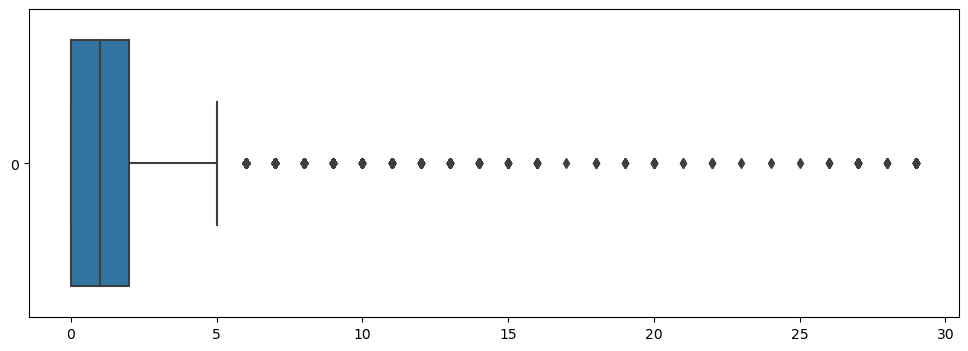

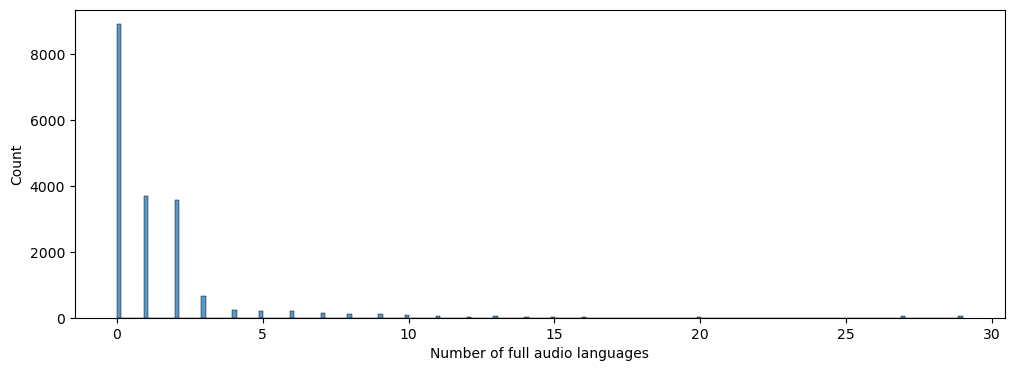

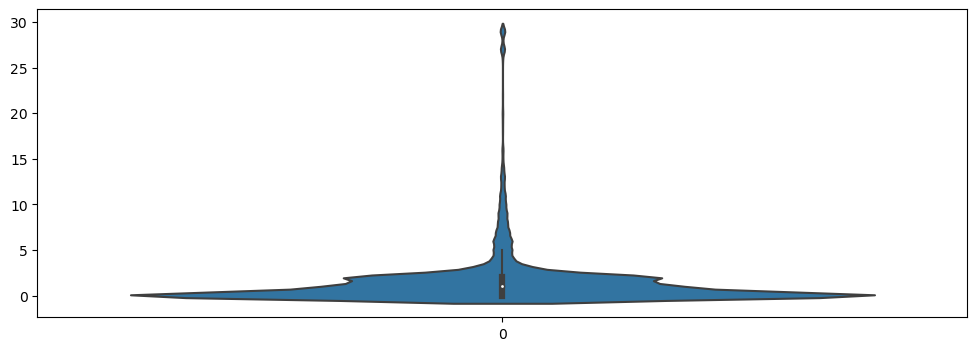

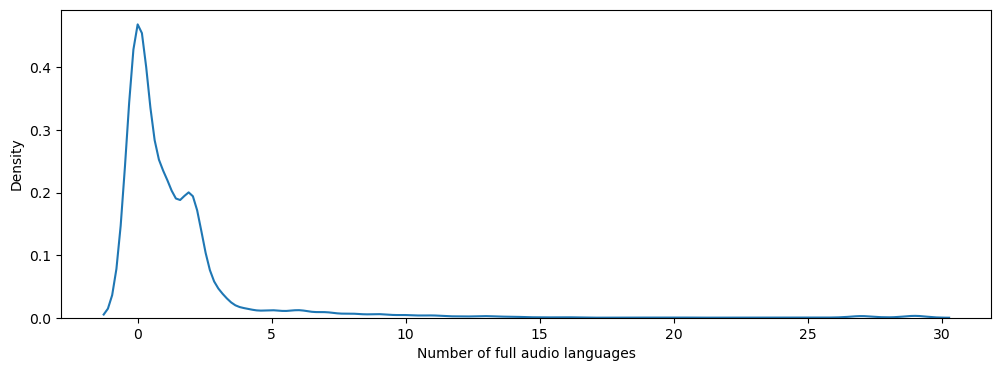

In [29]:
#univariate analysis of audio_count 
audio_count = audio_data['Number of full audio languages']
print(audio_count.head())

#summary
print(audio_count.describe())

#boxplot
f = plt.figure(figsize=(12, 4))
sb.boxplot(data = audio_count, orient = "h")

#hist plot
f = plt.figure(figsize=(12, 4))
sb.histplot(data = audio_count)

#violin plot
f = plt.figure(figsize=(12, 4))
sb.violinplot(data = audio_count)

#kde plot
f = plt.figure(figsize=(12, 4))
sb.kdeplot(data = audio_count)

   Number of full audio languages  Price
0                             0.0   0.00
1                             0.0  14.99
2                             2.0   3.99
3                             0.0  23.99
4                             1.0   0.00
                                Number of full audio languages    Price
Number of full audio languages                         1.00000  0.10362
Price                                                  0.10362  1.00000


<AxesSubplot:>

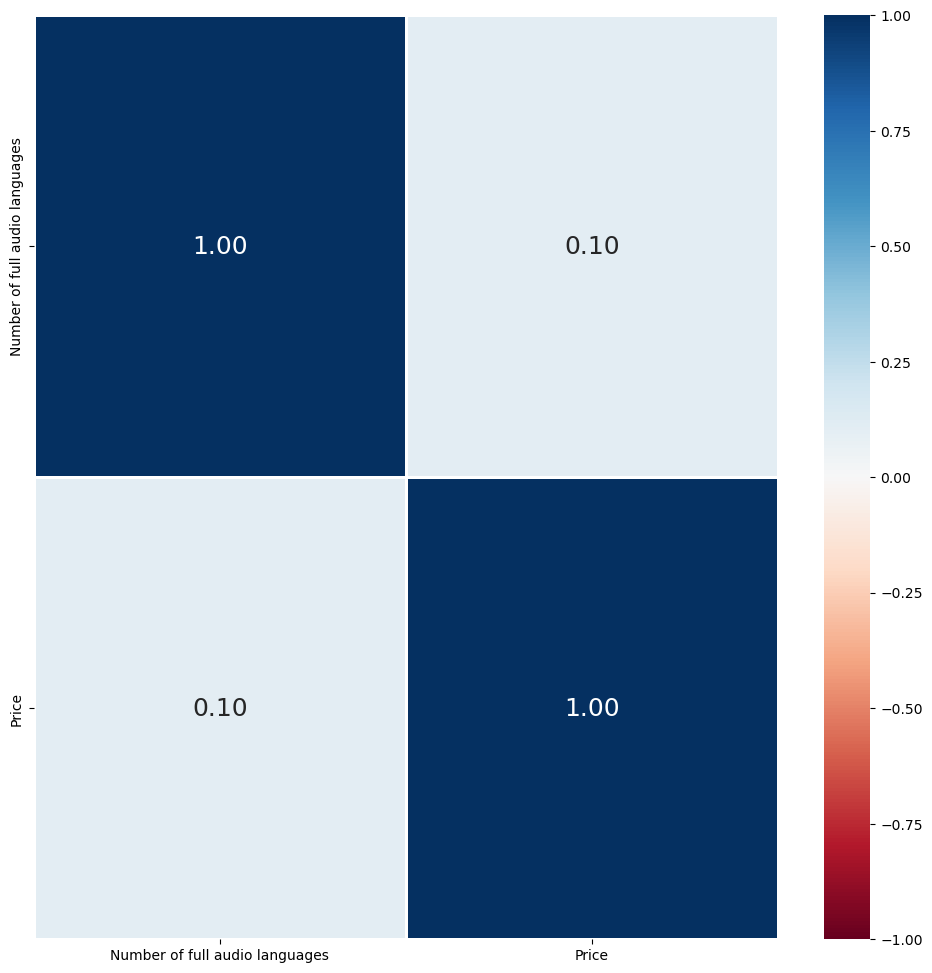

In [30]:
# Analyse relationship between audio count and price
# Add Price to the dataframe
audio_price = audio_count.copy()
audio_price = pd.concat([audio_price, game_data["Price"]], axis = 1).reindex(audio_price.index)
print(audio_price.head())

# Correlation Matrix
print(audio_price.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(audio_price.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

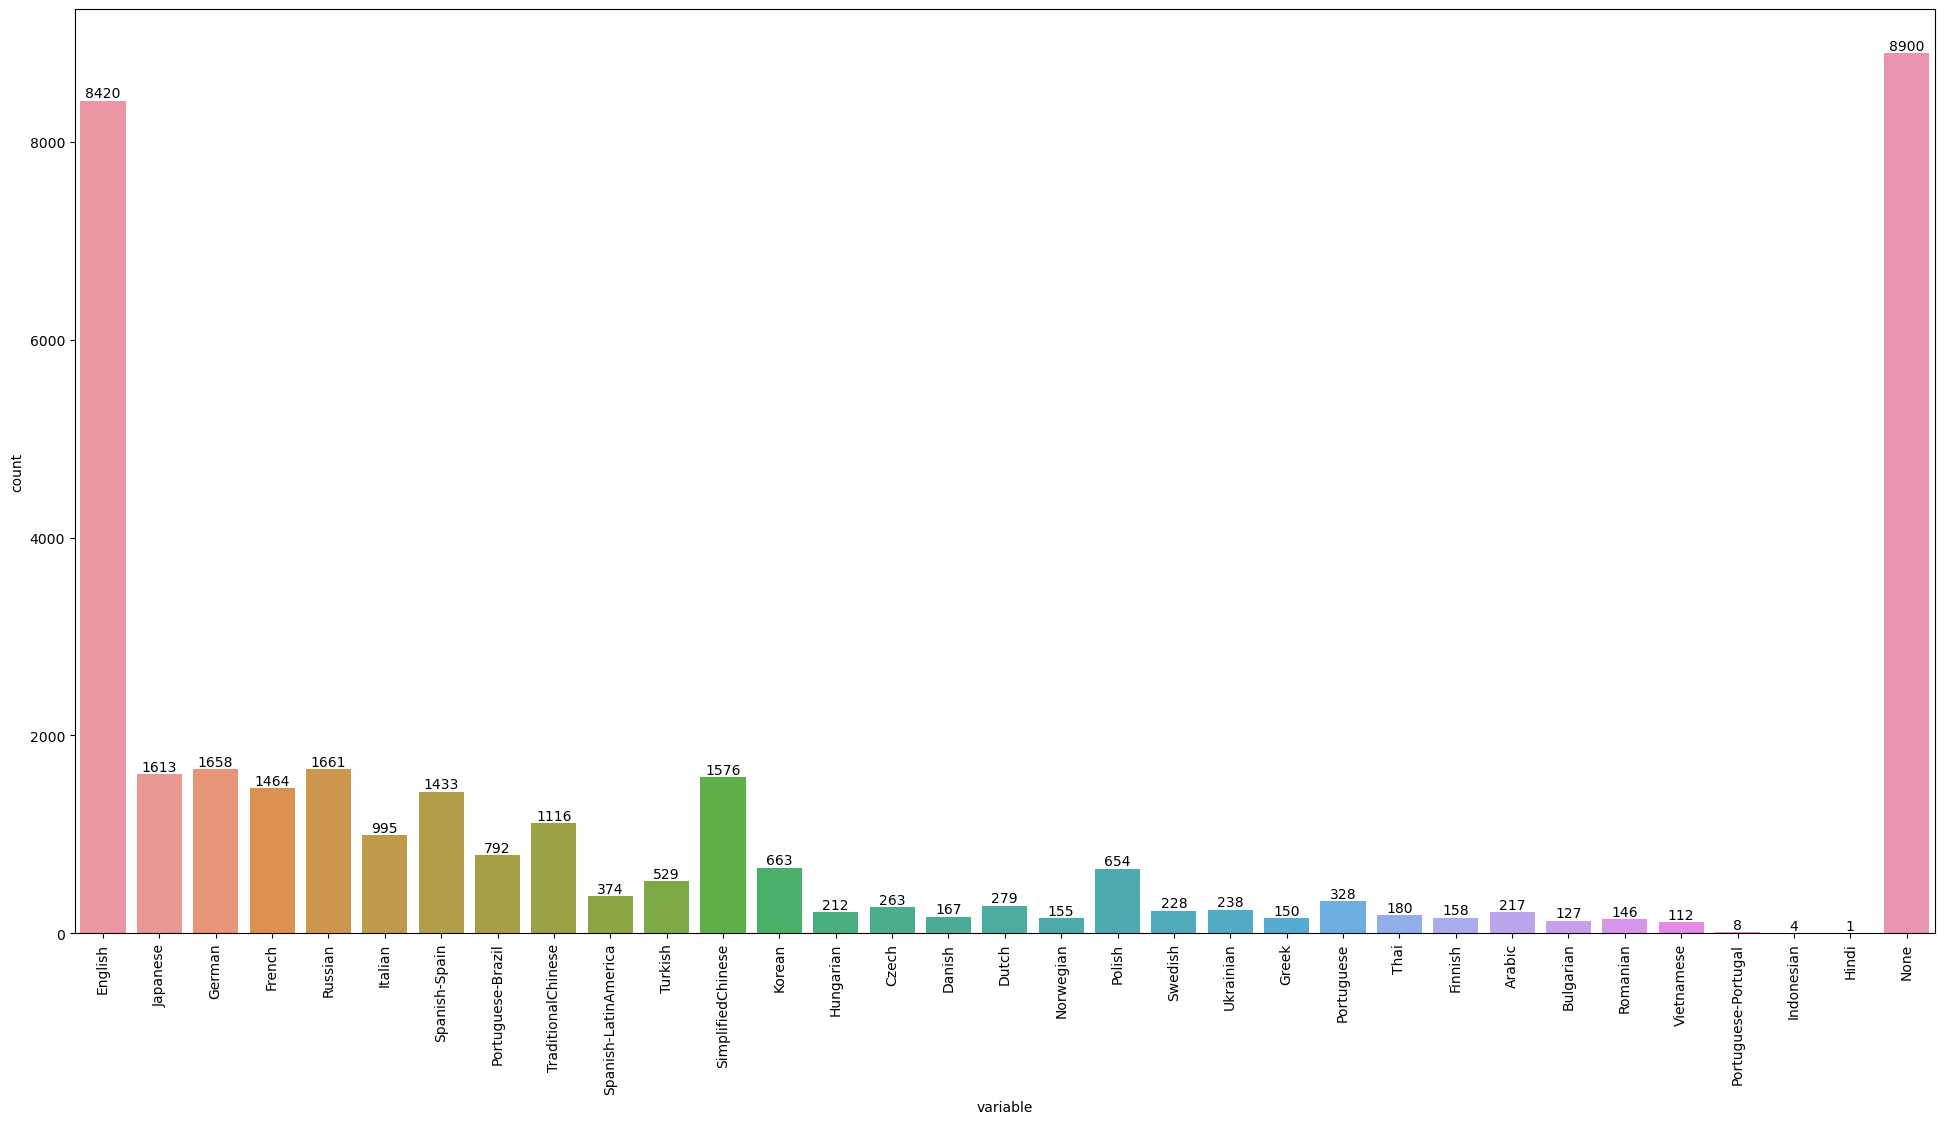

In [31]:
#countplot of each individual audio language
audio_sep = pd.read_csv('data/AudioProcessing.csv')

audio_sep.drop(columns =['Price', 'AppID', 'Name'], inplace=True)

audio_sep2 = audio_sep.melt(value_vars=audio_sep.columns)
audio_sep2 = audio_sep2[audio_sep2["value"] != 'F']
f = plt.figure(figsize=(24, 12))

graph = sb.countplot(data=audio_sep2, x="variable")
graph.bar_label(graph.containers[0])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

plt.show()

count    8900.000000
mean        9.078590
std         9.805385
min         0.000000
25%         1.990000
50%         6.990000
75%        14.990000
max       269.990000
Name: None, dtype: float64


[Text(0, 0, 'English'),
 Text(1, 0, 'Japanese'),
 Text(2, 0, 'German'),
 Text(3, 0, 'French'),
 Text(4, 0, 'Russian'),
 Text(5, 0, 'Italian'),
 Text(6, 0, 'Spanish-Spain'),
 Text(7, 0, 'Portuguese-Brazil'),
 Text(8, 0, 'TraditionalChinese'),
 Text(9, 0, 'Spanish-LatinAmerica'),
 Text(10, 0, 'Turkish'),
 Text(11, 0, 'SimplifiedChinese'),
 Text(12, 0, 'Korean'),
 Text(13, 0, 'Hungarian'),
 Text(14, 0, 'Czech'),
 Text(15, 0, 'Danish'),
 Text(16, 0, 'Dutch'),
 Text(17, 0, 'Norwegian'),
 Text(18, 0, 'Polish'),
 Text(19, 0, 'Swedish'),
 Text(20, 0, 'Ukrainian'),
 Text(21, 0, 'Greek'),
 Text(22, 0, 'Portuguese'),
 Text(23, 0, 'Thai'),
 Text(24, 0, 'Finnish'),
 Text(25, 0, 'Arabic'),
 Text(26, 0, 'Bulgarian'),
 Text(27, 0, 'Romanian'),
 Text(28, 0, 'Vietnamese'),
 Text(29, 0, 'Portuguese-Portugal'),
 Text(30, 0, 'Indonesian'),
 Text(31, 0, 'Hindi'),
 Text(32, 0, 'None')]

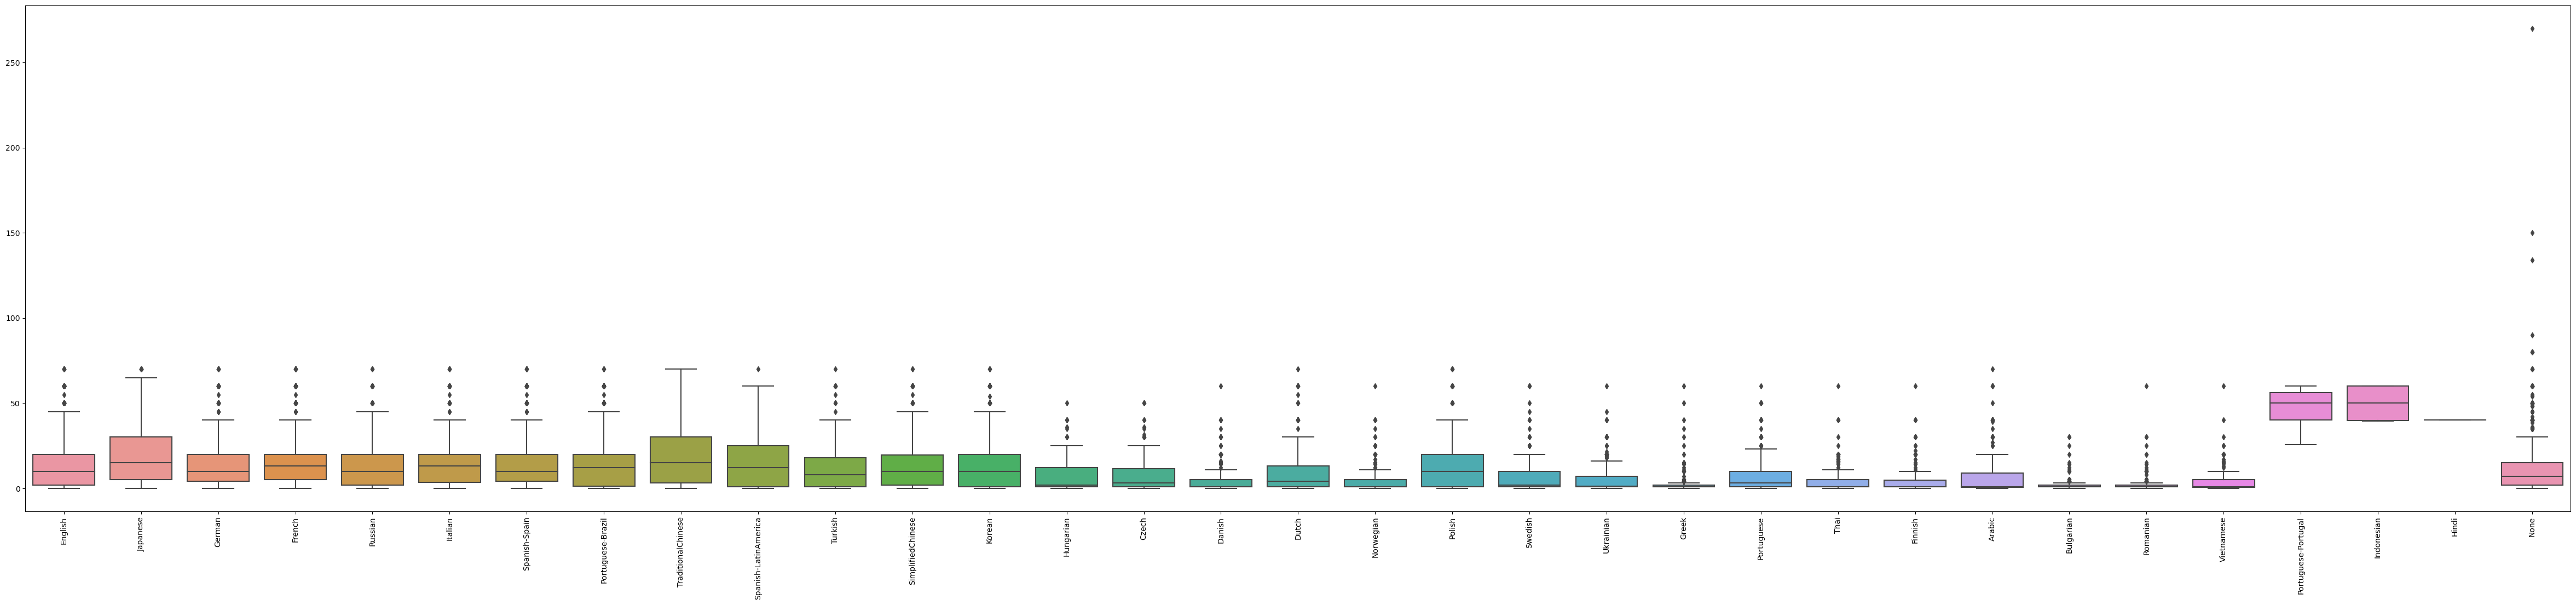

In [32]:
# boxplots for every audio language against price

#print(audio_sep_price.head())
audio_sep_price = pd.read_csv('data/AudioProcessing2.csv').copy()
print(audio_sep_price['None'].describe())

#audio_sep_price = pd.read_csv('Audio_separated_price.csv').copy()
audio_sep_price = audio_sep_price.drop(columns =['AppID', 'Price'])
f = plt.figure(figsize=(60, 12))


graph = sb.boxplot(data = audio_sep_price)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)